# Assignment: Trees
Do three questions.

**Q1.** Please answer the following questions in your own words.

1. How are trees constructed?

2. How do trees handle non-linear relationships between variables? Compare this to linear models.

3. Why is the Gini a good loss function for categorical target variables?

4. Why do trees tend to overfit, and how can this tendency be constrained?

5. True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates.

6. Why don't most versions of classification/regression tree concept allow for more than two branches after a split?

7. What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?

1. How are trees constructed?
Decision trees are built by splitting the data into smaller and smaller groups based on the features. The algorithm starts at the top with all the data and chooses a feature and a value to split on that best separates the data. It keeps repeating this process for each resulting group until a stopping rule is met, like the tree reaching a certain depth or having too few samples to split further.

2. How do trees handle non-linear relationships between variables? Compare this to linear models.
Trees are good at handling non-linear relationships because they don’t assume a straight-line connection between the inputs and the output. They split the data based on conditions that can form very flexible boundaries. In contrast, linear models can only really draw straight lines (or planes in higher dimensions), which makes them struggle when the relationship is more complex.

3. Why is the Gini a good loss function for categorical target variables?
The Gini score tells us how mixed up the classes are in a group. A lower Gini score means the group mostly contains one class, which is what we want. It’s useful because it helps the tree find splits that lead to more pure groups, which usually means better predictions.

4. Why do trees tend to overfit, and how can this tendency be constrained?
Trees can overfit because they can keep splitting until every group is super specific, even to the point of memorizing noise in the data. To prevent this, we can limit how deep the tree goes, require a minimum number of samples in a group before splitting, or prune back the tree after it’s been built. Another option is to use a method like Random Forests, which averages many trees and reduces overfitting.

5. True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates.
False. Trees can handle both numerical and categorical variables well. They are often praised for working easily with categories, but they’re also effective with continuous variables because they can split at any point on a number line. Their flexibility makes them useful in all kinds of data situations.

6. Why don't most versions of classification/regression tree concept allow for more than two branches after a split?
Most trees use two-way splits because it keeps the structure simple and makes the algorithm more manageable. It also allows for more precise decisions by gradually narrowing things down. Splitting into more than two groups at once can make the tree harder to read and might not improve performance much.

7. What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?
You might be overfitting if the tree is really deep, has lots of small branches with only a few samples, or does very well on training data but poorly on test data. Underfitting might show up as a tree that’s too shallow, with only a few splits, and high error even on training data. Looking at cross-validation scores and the shape of the tree can help you decide.




**Q2.** This is a case study on regression and classification trees.

1. Load `./data/cars_hw.csv`. How many observations and features/covariates/variables? What are the available variables? Take a look at the first few rows of data.

2. For the categorical variables `Make`, `Color`, `Body_type`, `No_of_Owners`, `Fuel_Type`, `Transmission`, and `Transmission_Type`, create dummy/one-hot-encoded representations. For numeric variables, we'll use `Mileage_Run`, `Make_Year`, and `Seating_Capacity`. Our target variable will be `Price`. Make a train-test split of your data.

3. From `sklearn.tree`, import the `DecisionTreeRegressor` and `plot_tree`. Use a train-test split to iterate over possible values for `min_samples_leaf`, computing the $R^2$ for each value between 1 and 25. What choice achieves the highest $R^2$ on the test data?

4. For the optimal `min_samples_leaf` from 3, regress price on the rest of the features/covariates using the training data. What is your $R^2$ and RMSE on the test set? Plot the dendrogram. Plot the residuals. Is the density of residuals symmetric and centered around 0?

4. Run a linear regression of price on the same variables. Which model -- regression tree or linear regression -- performs better on the test set? Why?

5. Predict prices using both your tree and your linear model, and make a scatter plot of their values. Describe what you see.

Shape of data: (976, 12)
Columns: ['Unnamed: 0', 'Make', 'Make_Year', 'Color', 'Body_Type', 'Mileage_Run', 'No_of_Owners', 'Seating_Capacity', 'Fuel_Type', 'Transmission', 'Transmission_Type', 'Price']


,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


Train shape: (780, 45) | Test shape: (196, 45)
Best min_samples_leaf: 5
Best R² score: 0.8228418832488933
Decision Tree R²: 0.8228418832488933
Decision Tree RMSE: 142545.55655889618


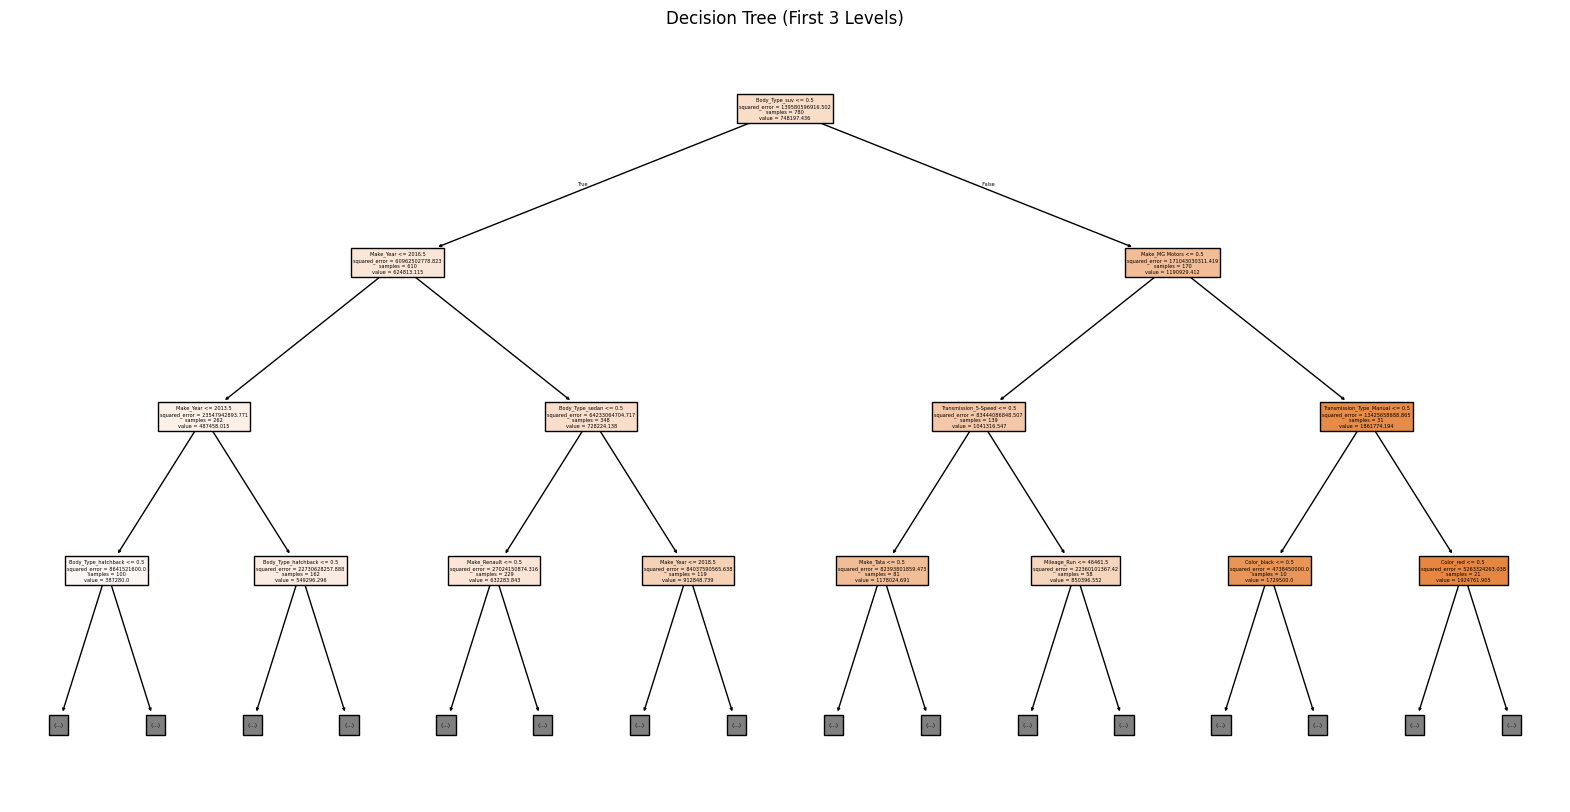

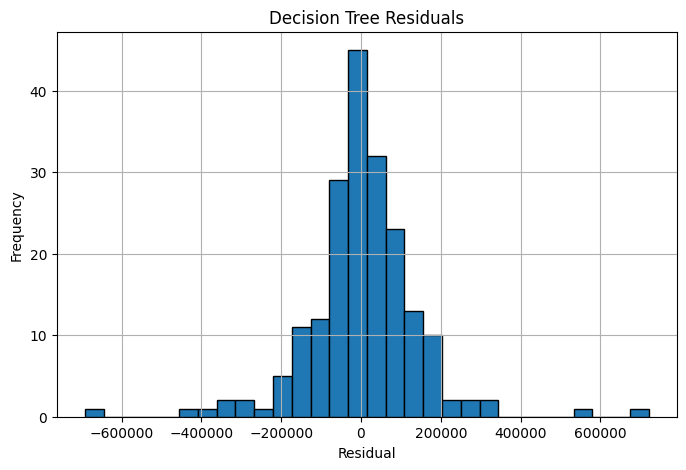

Linear Regression R²: 0.8202733305989025
Linear Regression RMSE: 143575.1966058975


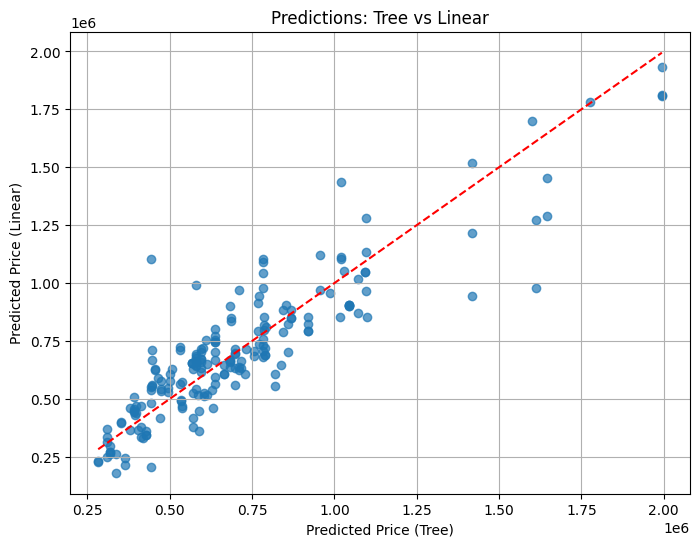

In [2]:
# Q2: Regression and Classification Trees Case Study

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# 1. Load the data
df = pd.read_csv('cars_hw.csv')
print("Shape of data:", df.shape)
print("Columns:", df.columns.tolist())
display(df.head())

# 2. Preprocessing
df = df.drop(columns=['Unnamed: 0'])  # Drop index column
categorical_cols = ['Make', 'Color', 'Body_Type', 'No_of_Owners',
                    'Fuel_Type', 'Transmission', 'Transmission_Type']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

X = df_encoded.drop(columns=['Price'])
y = df_encoded['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train shape:", X_train.shape, "| Test shape:", X_test.shape)

# 3. Tune min_samples_leaf in Decision Tree
r2_scores = []
leaf_values = list(range(1, 26))

for leaf in leaf_values:
    model = DecisionTreeRegressor(min_samples_leaf=leaf, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

best_leaf = leaf_values[np.argmax(r2_scores)]
print("Best min_samples_leaf:", best_leaf)
print("Best R² score:", max(r2_scores))

# 4. Train and evaluate best decision tree
tree_model = DecisionTreeRegressor(min_samples_leaf=best_leaf, random_state=42)
tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)
r2_tree = r2_score(y_test, y_pred_tree)
rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))

print("Decision Tree R²:", r2_tree)
print("Decision Tree RMSE:", rmse_tree)

# Plot a simple version of the tree
plt.figure(figsize=(20, 10))
plot_tree(tree_model, filled=True, max_depth=3, feature_names=X.columns)
plt.title("Decision Tree (First 3 Levels)")
plt.show()

# Plot residuals of tree
residuals = y_test - y_pred_tree
plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=30, edgecolor='k')
plt.title("Decision Tree Residuals")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# 5. Linear Regression model
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

y_pred_lin = lin_model.predict(X_test)
r2_lin = r2_score(y_test, y_pred_lin)
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))

print("Linear Regression R²:", r2_lin)
print("Linear Regression RMSE:", rmse_lin)

# 6. Scatter plot comparing tree vs linear predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_tree, y_pred_lin, alpha=0.7)
plt.xlabel("Predicted Price (Tree)")
plt.ylabel("Predicted Price (Linear)")
plt.title("Predictions: Tree vs Linear")
plt.grid(True)
plt.plot([min(y_pred_tree), max(y_pred_tree)],
         [min(y_pred_tree), max(y_pred_tree)],
         color='red', linestyle='--')
plt.show()


**Q3.** This is a case study about classification and regression trees.

1. Load the `Breast Cancer METABRIC.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  We'll use a consistent set of feature/explanatory variables. For numeric variables, we'll include `Tumor Size`, `Lymph nodes examined positive`, `Age at Diagnosis`. For categorical variables, we'll include `Tumor Stage`, `Chemotherapy`, and `Cancer Type Detailed`. One-hot-encode the categorical variables and concatenate them with the numeric variables into a feature/covariate matrix, $X$.

3. Let's predict `Overall Survival Status` given the features/covariates $X$. There are 528 missing values, unfortunately: Either drop those rows from your data or add them as a category to predict. Constrain the minimum samples per leaf to 10. Print a dendrogram of the tree. Print a confusion matrix of the algorithm's performance. What is the accuracy?

4. For your model in part three, compute three statistics:
    - The **true positive rate** or **sensitivity**:
        $$
        TPR = \dfrac{TP}{TP+FN}
        $$
    - The **true negative rate** or **specificity**:
        $$
        TNR = \dfrac{TN}{TN+FP}
        $$
    Does your model tend to perform better with respect to one of these metrics?

5. Let's predict `Overall Survival (Months)` given the features/covariates $X$. Use the train/test split to pick the optimal `min_samples_leaf` value that gives the highest $R^2$ on the test set (it's about 110). What is the $R^2$? Plot the test values against the predicted values. How do you feel about this model for clinical purposes?

**Q4.** This is a case study about trees using bond rating data. This is a dataset about bond ratings for different companies, alongside a bunch of business statistics and other data. Companies often have multiple reviews at different dates. We want to predict the bond rating (AAA, AA, A, BBB, BB, B, ..., C, D). Do business fundamentals predict the company's rating?

1. Load the `./data/corporate_ratings.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  Plot a histogram of the `ratings` variable. It turns out that the gradations of AAA/AA/A and BBB/BB/B and so on make it hard to get good results with trees. Collapse all AAA/AA/A ratings into just A, and similarly for B and C.

3. Use all of the variables **except** Rating, Date, Name, Symbol, and Rating Agency Name. To include Sector, make a dummy/one-hot-encoded representation and include it in your features/covariates. Collect the relevant variables into a data matrix $X$.

4. Do a train/test split of the data and use a decision tree classifier to predict the bond rating. Including a min_samples_leaf constraint can raise the accuracy and speed up computation time. Print a confusion matrix and the accuracy of your model. How well do you predict the different bond ratings?

5. If you include the rating agency as a feature/covariate/predictor variable, do the results change? How do you interpret this?

**Q5.** This is a case study about detecting fraud using classification trees. The goal is to predict the `class` variable, which is 0 for non-fraud and 1 for fraud.

1. Open `./data/creditcard_fraud.csv`. Print the number of observations and variables, and look at the first few rows of data. The variables are already normalized and de-identified, and are just called things like `V8` to protect the privacy of the clients.

2. Print a table of counts for the `class` variable and make a histogram. What percentage of transactions are fraudulent?

3. Drop `Time` and make a decision tree classifier to predict fraud. Print a confusion table and compute the accuracy. This is a serious **class imbalance** problem: The minority class is so small that essentially predicting 0's for all cases will achieve an extremely high accuracy. There are over-sampling techniques to deal with this issue, but we don't have time to cover them in class.

4. Imagine that you block every transaction in the test set labelled as fraudulent. How much money is (1) saved that should be saved, (2) lost to fraud anyway, (3) withheld in error from customers? Does implementing this anti-fraud system seem like a good idea, or not? Why?

5. Instead of predicting fraud, predict loss: Multiple the `Class` variable times the `Amount` variable, and call it `Loss`. Predict it using a decision tree regressor (making sure to drop Class, Time, and Loss from the features/covariates/predictors). What $R^2$ and RMSE do you get? Make a scatterplot of the predicted values on the test group versus the actual test values. Do you notice any interesting patterns? How could you use this algorithm to decide which transactions to block, and why?


**Q6.** Show that any decision tree is equivalent to a linear regression on a set of dummy variables that represent the optimal splits in the tree.

Hint: You can think of CART as partitioning the feature space into a set of sets $\{S_1, S_2, ..., S_K\}$, and then predicting the average for all of the observations in each set $S_k$, $m_k$:
$$
\hat{y}(x) = \sum_{k=1}^K \mathbb{I}\{ x \text{ is in } S_k \} m_k
$$
where $\mathbb{I} \{ P(x,k)\}$ takes the value 1 if the proposition $P(x,k)$ is true and 0 otherwise. Now, doesn't that look like least-squares regression on a set of dummy/one-hot-encoded variables?

Conversely, can any linear regression be represented by a tree?



We can think of CART (Classification and Regression Trees) as partitioning the input feature space into a set of disjoint regions:

{S1, S2, ..., SK}

Each region Sk corresponds to a leaf in the tree, and each leaf holds a constant value mk, which is usually the mean of the target variable for all training samples in that region.


    y_hat(x) = sum over k [ I{x in Sk} * mk ]

Here I{x in Sk} is an indicator function that is 1 if x belongs to region Sk and 0 otherwise. So the model assigns x the mean value mk of the region it belongs to.

This is equivalent to a linear regression model using dummy variables. We can create K dummy variables one for each region, where each Dk is 1 if x belongs to Sk, and 0 otherwise.

The model becomes:

    y_hat(x) = beta_1 * D1 + beta_2 * D2 + ... + beta_K * DK

which is simply a linear regression model on dummy variables, with coefficients beta_k equal to mk.

Therefore, any regression tree is equivalent to a linear regression model on a set of dummy variables that represent the partitioning done by the tree.

Conversely, not every linear regression model can be represented by a decision tree. A linear regression model can express smooth, additive relationships between features, like:

    y = 4.5 * x1 + 2.1 * x2

A decision tree, however, predicts constant values within rectangular regions of the feature space. It would need many small splits to approximate such a model, and even then, the result would only be a piecewise constant approximation.

Conclusion:
- Yes, any regression tree can be expressed as a linear regression on dummy variables.
- No, not every linear regression model can be represented exactly by a regression tree.
